In [37]:
%matplotlib inline
import pyNN.nest as sim
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def two_neuron_example(
        current=3.0,
        time_simulation=2000.,
        weight=0.4,
        neuron_parameters={
            'v_rest'     : -65.0,
            'cm'         : 0.1,
            'tau_m'      : 1.0,
            'tau_refrac' : 2.0,
            'tau_syn_E'  : 10.0,
            'tau_syn_I'  : 10.0,
            'i_offset'   : 0.0,
            'v_reset'    : -65.0,
            'v_thresh'   : -50.0,
        },
    ):
    """
        Connects to neurons with corresponding parameters.

        The first is stimulated via current injection while the second receives
        the other one's spikes.
    """

    sim.setup(timestep=0.1, min_delay=0.1)

    pulse = sim.DCSource(amplitude=current, start=0.0, stop=time_simulation)

    pre = sim.Population(1, sim.IF_curr_exp(**neuron_parameters))
    post = sim.Population(1, sim.IF_curr_exp(**neuron_parameters))

    pre.record('spikes')
    post.record('spikes')

    sim.Projection(pre, post, connector=sim.OneToOneConnector(),
            synapse_type=sim.StaticSynapse(weight=weight),
            receptor_type='excitatory')

    pulse.inject_into(pre)

    sim.run(time_simulation)

    # rates in Hz
    rate_pre = len(pre.get_data('spikes').segments[0].spiketrains[0])\
            / time_simulation * 1000.

    rate_post = len(post.get_data('spikes').segments[0].spiketrains[0])\
            / time_simulation * 1000.

    sim.end()

    return rate_pre, rate_post

In [14]:
rate_pre, rate_post = two_neuron_example(current=2.9)

print "Rate (pre-synaptic neuron): {:.1f} Hz".format(rate_pre)
print "Rate (post-synaptic neuron): {:.1f} Hz".format(rate_post)

Rate (pre-synaptic neuron): 366.5 Hz
Rate (post-synaptic neuron): 119.5 Hz


# Plots

In [40]:
input_currents = np.arange(0,8,0.2)
output_rates = np.array([two_neuron_example(current=input_current) for input_current in input_currents])

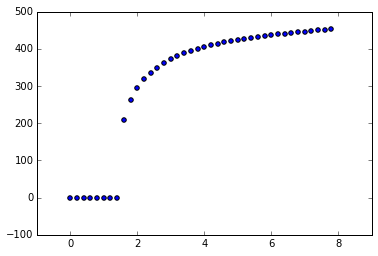

In [41]:
plt.cla()
plt.scatter(input_currents, output_rates[:,0])

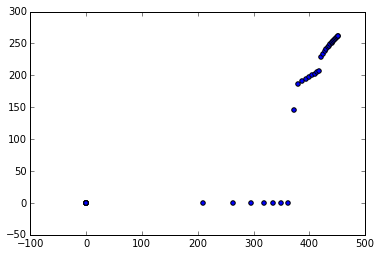

In [42]:
plt.scatter(output_rates[:,0], output_rates[:,1])